# Name - Ayushman Chaudhary

# Reg. No. - RA1811027010080

# Experiment No. 6 - Implementation of Mini-Max Algorithm for an Application

# Game: Tic-Tac-Toe

## Rules of the Game

1) The game is to be played between two people (in this experiment, between the USER and the COMPUTER).  
2) One of the player chooses ‘O’ and the other ‘X’ to mark their respective cells.  
3) The game starts with one of the players and the game ends when one of the players has one whole row/column/diagonal filled      with his/her respective character (‘O’ or ‘X’).  
4) If no one wins, then the game is said to be draw.  

## State Space Tree Diagram

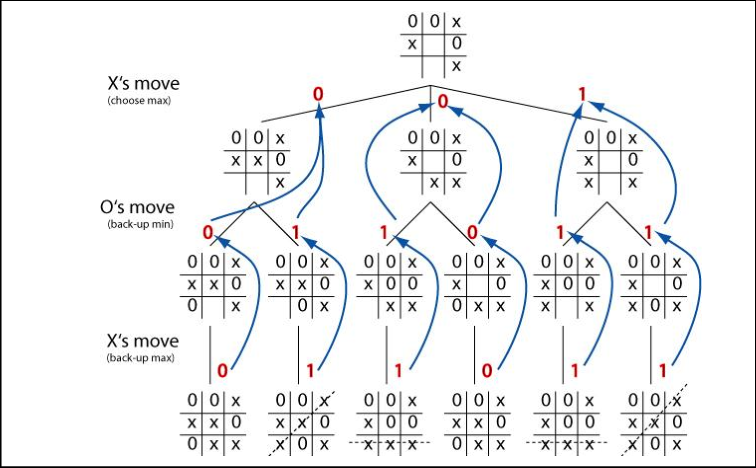

## Code

In [2]:
''' Implementation of Mini-Max Algorithm to find the next optimal move for the player '''

player, opponent = 'x', 'o' # User - 'x' and Computer - 'o'

# This function returns true if there are moves remaining on the board. 
# It returns false if there are no moves left to play. 
def isMovesLeft(board) : 
    for i in range(3) :
        for j in range(3) :
            if (board[i][j] == '_') :
                return True
    return False

# Evaluation Function
def evaluate(b) : 
    # Checking for Rows for X or O victory. 
    for row in range(3) :
        if (b[row][0] == b[row][1] and b[row][1] == b[row][2]) :
            if (b[row][0] == player) :
                return 1
            elif (b[row][0] == opponent) :
                return -1

    # Checking for Columns for X or O victory.
    for col in range(3) :
        if (b[0][col] == b[1][col] and b[1][col] == b[2][col]) :
            if (b[0][col] == player) : 
                return 1
            elif (b[0][col] == opponent) :
                return -1

    # Checking for Diagonals for X or O victory. 
    if (b[0][0] == b[1][1] and b[1][1] == b[2][2]) :
        if (b[0][0] == player) :
            return 1
        elif (b[0][0] == opponent) :
            return -1

    if (b[0][2] == b[1][1] and b[1][1] == b[2][0]) :
        if (b[0][2] == player) :
            return 1
        elif (b[0][2] == opponent) :
            return -1

    # Else if none of them have won then return 0 
    return 0

# This is the mini-max function. It considers all the possible ways the game can go and returns the value of the board 
def minimax(board, depth, isMax) : 
    score = evaluate(board)

    # If Maximizer has won the game return his/her evaluated score 
    if (score == 1) : 
        return score

    # If Minimizer has won the game return his/her evaluated score 
    if (score == -1) :
        return score

    # If there are no more moves and no winner then it is a tie 
    if (isMovesLeft(board) == False) :
        return 0

    # If there's the maximizer's move 
    if (isMax) :
        best = -1000
        # Traverse all cells 
        for i in range(3) :
            for j in range(3) :
                # Check if cell is empty 
                if (board[i][j]=='_') :
                    # Make the move 
                    board[i][j] = player 

                    # Call minimax recursively and choose the maximum value 
                    best = max( best, minimax(board,depth + 1,not isMax) )

                    # Undo the move 
                    board[i][j] = '_'
        return best

    # If this minimizer's move 
    else :
        best = 1000

        # Traverse all cells 
        for i in range(3) :
            for j in range(3) :
                # Check if cell is empty 
                if (board[i][j] == '_') :
                    # Make the move 
                    board[i][j] = opponent 

                    # Call minimax recursively and choose the minimum value 
                    best = min(best, minimax(board, depth + 1, not isMax))

                    # Undo the move 
                    board[i][j] = '_'
        return best

# This will return the best possible move for the player 
def findBestMove(board) : 
    # Default assignment of values
    bestVal = -1000
    bestMove = (-1, -1) 

    # Traverse all cells, evaluate minimax function for all empty cells. And return the cell with optimal value. 
    for i in range(3) :	
        for j in range(3) :
            # Check if cell is empty 
            if (board[i][j] == '_') : 
                # Make the move 
                board[i][j] = player

                # compute evaluation function for this move. 
                moveVal = minimax(board, 0, False) 

                # Undo the move 
                board[i][j] = '_'

                # If the value of the current move is more than the best value, then update best 
                if (moveVal > bestVal) :
                    bestMove = (i, j)
                    bestVal = moveVal

    print("\nThe value of the best move is:", bestVal)
    print()
    return bestMove

board = []
print("Enter the current status of the board: (Enter _ for space i.e. no move)")
for i in range(3):
    board.append(input().split())

bestMove = findBestMove(board) 

print("The Optimal Move is :") 
print("ROW:", bestMove[0]+1, " COL:", bestMove[1]+1)

Enter the current status of the board: (Enter _ for space i.e. no move)
o o x
x _ o
_ _ x

The value of the best move is: 1

The Optimal Move is :
ROW: 3  COL: 1
